In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from models import pentzer2014icr as pentzer2014icr
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "M04"


In [3]:
preprocess(abbr, verbose=False)
icrdf = pentzer2014icr.pentzer2014icr(abbr, verbose=False)


M04: 100%|██████████| 195/195 [00:00<00:00, 2663.08it/s]
/home/norlab/code/202206/terrain-code/models/pentzer2014icr.py:206: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fdf.Bs = fdf.ICRyL - fdf.ICRyR
/home/norlab/code/202206/terrain-code/models/pentzer2014icr.py:207: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fdf.ICRyave = (fdf.ICRyL + fdf.ICRyR) / 2


In [4]:
icrdf.columns.values

array(['time', 'time_rel', 'vx', 'vy', 'vz', 'wz', 'current', 'voltage',
       'ax', 'ay', 'az', 'theta', 'phi', 'qw', 'qx', 'qy', 'qz', 'cmd_v',
       'cmd_w', 'wL', 'wR', 'px', 'py', 'pz', 'I_L', 'I_R', 'V_L', 'V_R',
       'lat', 'long', 'alt', 'ax_corr', 'ay_corr', 'az_corr', 'vL', 'vR',
       'cosp', 'sinp', 'px_ekf', 'py_ekf', 'phi_ekf', 'ICRyL', 'ICRyR',
       'ICRx'], dtype=object)

In [5]:
model_name = pentzer2014icr.__MODEL_NAME__.lower()
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename, subdir=model_name)
model_name = pentzer2014icr.__MODEL_NAME__.title()

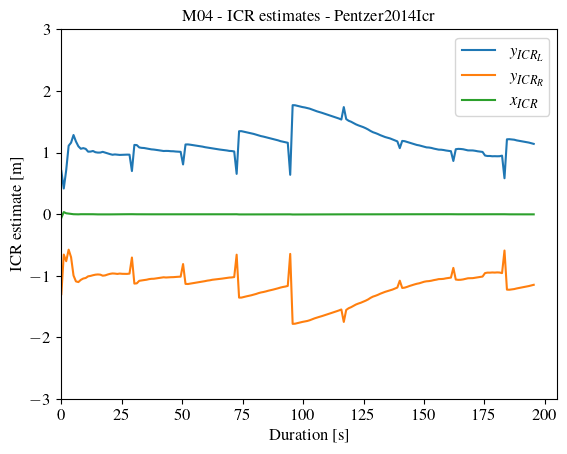

In [6]:
fig, ax = plt.subplots()
ax.plot(icrdf.time_rel, icrdf.ICRyL, label=r"$y_{{ICR}_{L}}$")
ax.plot(icrdf.time_rel, icrdf.ICRyR, label=r"$y_{{ICR}_{R}}$")
ax.plot(icrdf.time_rel, icrdf.ICRx, label=r"$x_{ICR}$")
ax.set_xlim(left=0)
ax.set_xlabel("Duration [s]")
ax.set_ylabel("ICR estimate [m]")
ax.legend()
ax.set_title(f"{abbr} - ICR estimates - {model_name}")
ax.set_ylim((-3, 3))

fig.savefig(figdir / f"{abbr}_ICR_estimates.jpg", bbox_inches="tight")

(-3.0, 3.0)

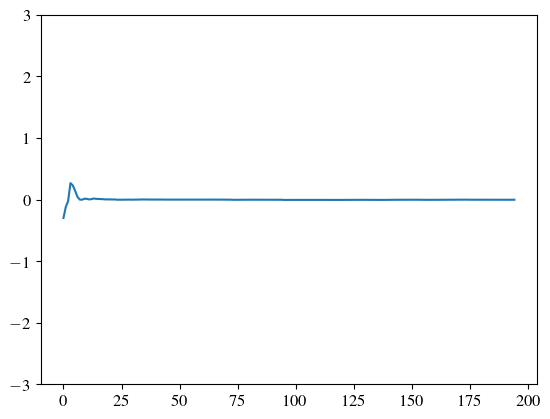

In [7]:
fig, ax = plt.subplots()
# icrdf.Bs.plot(ax=ax)
icrdf.ICRyave.plot(ax=ax)
ax.set_ylim((-3, 3))


25    1.932008
26    1.932617
27    1.936085
28    1.930890
29    1.403981
dtype: float64

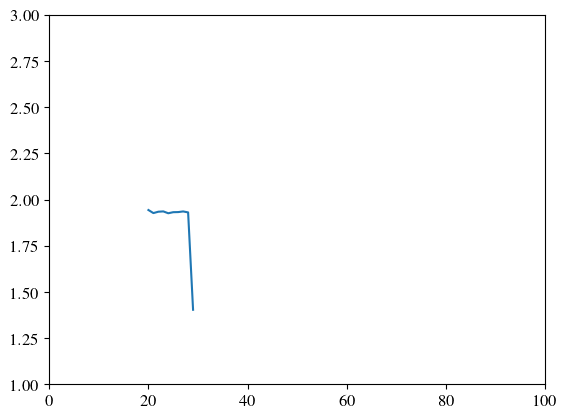

In [8]:
bstail = icrdf.Bs[20:30].tail(n=20)
bstail.plot(ylim=(1,3), xlim=(0,100))
bstail.tail()

In [9]:
icrdf.time_rel.tail()

190    191.325100
191    192.330539
192    193.339009
193    194.344568
194    195.354517
Name: time_rel, dtype: float64

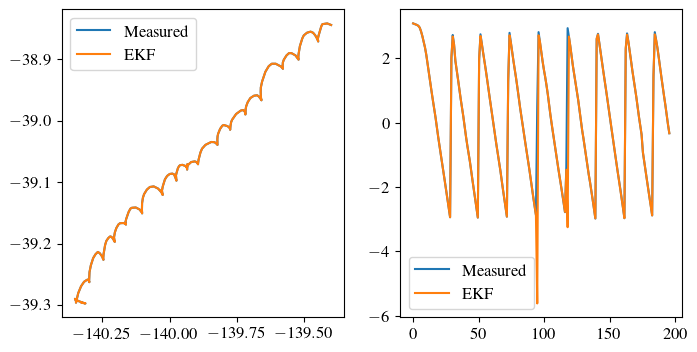

In [10]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(8,4))

ax1.plot(icrdf.px, icrdf.py, label="Measured")
ax1.plot(icrdf.px_ekf, icrdf.py_ekf, label="EKF")
ax1.legend()

ax2.plot(icrdf.time_rel, icrdf.phi, label="Measured")
ax2.plot(icrdf.time_rel, icrdf.phi_ekf, label="EKF")
ax2.legend()

In [11]:
icrdf[["px", "py", "pz", "phi", "vL", "vR"]].head()

px         py        pz       phi        vL        vR
0 -140.326880 -39.296100 -2.584857  3.082994  0.027162 -0.068722
1 -140.322887 -39.296428 -2.584858  3.065350  0.004909 -0.018980
2 -140.315989 -39.296999 -2.584854  3.051065  0.005890 -0.018653
3 -140.312867 -39.297274 -2.584850  3.033614  0.029780 -0.009163
4 -140.322410 -39.296082 -2.584858  3.006814  0.046797 -0.014726

In [12]:
import numpy as np
np.cos(icrdf.phi)

0     -0.998284
1     -0.997095
2     -0.995905
3     -0.994176
4     -0.990931
         ...   
190    0.678481
191    0.854169
192    0.970900
193    0.997957
194    0.945194
Name: phi, Length: 195, dtype: float64

In [13]:
icrdf[["ICRyL", "ICRyR", "ICRx"]].tail(20)

ICRyL     ICRyR      ICRx
175  0.945061 -0.948092 -0.001834
176  0.945439 -0.948666 -0.001749
177  0.940860 -0.945465 -0.001583
178  0.942116 -0.947454 -0.001295
179  0.940674 -0.944553 -0.001054
180  0.941712 -0.946531 -0.000971
181  0.950809 -0.956264 -0.000618
182  0.583950 -0.589437 -0.000391
183  1.216054 -1.224137 -0.002002
184  1.217713 -1.225862 -0.001929
185  1.213152 -1.220937 -0.001837
186  1.209482 -1.214964 -0.001753
187  1.198644 -1.205040 -0.001801
188  1.191485 -1.197452 -0.001730
189  1.184464 -1.188438 -0.001838
190  1.176287 -1.181598 -0.002004
191  1.168785 -1.174320 -0.001962
192  1.162970 -1.166216 -0.002006
193  1.152149 -1.155528 -0.002213
194  1.141942 -1.146022 -0.002301

In [14]:
print(icrdf.columns.values)


['time' 'time_rel' 'vx' 'vy' 'vz' 'wz' 'current' 'voltage' 'ax' 'ay' 'az'
 'theta' 'phi' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'px' 'py'
 'pz' 'I_L' 'I_R' 'V_L' 'V_R' 'lat' 'long' 'alt' 'ax_corr' 'ay_corr'
 'az_corr' 'vL' 'vR' 'cosp' 'sinp' 'px_ekf' 'py_ekf' 'phi_ekf' 'ICRyL'
 'ICRyR' 'ICRx']


Text(0.5, 0, '$y_{ICR}$ (m)')

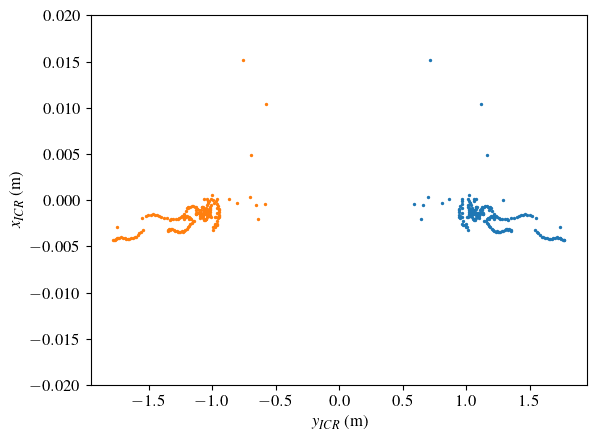

In [20]:
fig, ax = plt.subplots()
ax.scatter(icrdf.ICRyL, icrdf.ICRx, s=2)
ax.scatter(icrdf.ICRyR, icrdf.ICRx, s=2)
ax.set_ylim((-0.02,0.02))
# ax.set_xlim((-2,2))
ax.set_ylabel("$x_{ICR}$ (m)")
ax.set_xlabel("$y_{ICR}$ (m)")
